In [10]:

"""
"""

import os
import datetime
import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import sklearn 
mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

In [2]:
dataset= pd.read_csv("/content/drive/MyDrive/FTS/Copy of cities_by_hours.csv")

In [3]:
dataset.info

<bound method DataFrame.info of                  City         Datetime  PM2.5  ...  C8H10   AQI    AQI_Bucket
0           Ahmedabad    1/1/2015 1:00    NaN  ...    0.0   NaN           NaN
1           Ahmedabad    1/1/2015 2:00    NaN  ...    0.0   NaN           NaN
2           Ahmedabad    1/1/2015 3:00    NaN  ...    0.0   NaN           NaN
3           Ahmedabad    1/1/2015 4:00    NaN  ...    0.0   NaN           NaN
4           Ahmedabad    1/1/2015 5:00    NaN  ...    0.0   NaN           NaN
...               ...              ...    ...  ...    ...   ...           ...
707870  Visakhapatnam  6/30/2020 20:00   9.50  ...    NaN  51.0  Satisfactory
707871  Visakhapatnam  6/30/2020 21:00  17.25  ...    NaN  51.0  Satisfactory
707872  Visakhapatnam  6/30/2020 22:00  36.00  ...    NaN  50.0          Good
707873  Visakhapatnam  6/30/2020 23:00  15.75  ...    NaN  50.0          Good
707874  Visakhapatnam    7/1/2020 0:00  15.00  ...    NaN  50.0          Good

[707875 rows x 16 columns]>

In [5]:
dataset.isnull().sum()

City               0
Datetime           0
PM2.5         145088
PM10          296737
NO            116632
NO2           117122
NOx           123224
NH3           272542
CO             86517
SO2           130373
O3            129208
C6H6          163646
C7H8          220607
C8H10         455829
AQI           129080
AQI_Bucket    129080
dtype: int64

In [7]:
cities=dataset['City'].unique()
cities

array(['Ahmedabad', 'Aizawl', 'Amaravati', 'Amritsar', 'Bengaluru',
       'Bhopal', 'Brajrajnagar', 'Chandigarh', 'Chennai', 'Coimbatore',
       'Delhi', 'Ernakulam', 'Gurugram', 'Guwahati', 'Hyderabad',
       'Jaipur', 'Jorapokhar', 'Kochi', 'Kolkata', 'Lucknow', 'Mumbai',
       'Patna', 'Shillong', 'Talcher', 'Thiruvananthapuram',
       'Visakhapatnam'], dtype=object)

## Prediction for Ahemdabad

In [8]:
Ahmedabad_data= dataset[dataset['City']=="Ahmedabad"]

In [9]:
Ahmedabad_data

,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,C6H6,C7H8,C8H10,AQI,AQI_Bucket
0,Ahmedabad,1/1/2015 1:00,NaN,NaN,1.00,40.01,36.37,NaN,1.00,122.07,NaN,0.00,0.00,0.00,NaN,NaN
1,Ahmedabad,1/1/2015 2:00,NaN,NaN,0.02,27.75,19.73,NaN,0.02,85.90,NaN,0.00,0.00,0.00,NaN,NaN
2,Ahmedabad,1/1/2015 3:00,NaN,NaN,0.08,19.32,11.08,NaN,0.08,52.83,NaN,0.00,0.00,0.00,NaN,NaN
3,Ahmedabad,1/1/2015 4:00,NaN,NaN,0.30,16.45,9.20,NaN,0.30,39.53,153.58,0.00,0.00,0.00,NaN,NaN
4,Ahmedabad,1/1/2015 5:00,NaN,NaN,0.12,14.90,7.85,NaN,0.12,32.63,NaN,0.00,0.00,0.00,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48187,Ahmedabad,6/30/2020 20:00,42.92,98.36,2.79,84.27,43.19,NaN,1.74,20.27,66.12,0.38,35.89,1.04,119.0,Moderate
48188,Ahmedabad,6/30/2020 21:00,44.41,88.17,4.28,56.44,30.73,NaN,0.57,15.20,42.41,1.26,43.14,1.57,119.0,Moderate
48189,Ahmedabad,6/30/2020 22:00,33.68,202.79,4.42,37.66,21.67,NaN,0.66,15.13,25.66,1.73,47.05,1.87,119.0,Moderate
48190,Ahmedabad,6/30/2020 23:00,56.86,222.73,3.77,29.78,17.34,NaN,0.04,11.66,14.35,1.73,47.05,1.87,119.0,Moderate


In [11]:
Ahmedabad_data.columns

Index(['City', 'Datetime', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO',
       'SO2', 'O3', 'C6H6', 'C7H8', 'C8H10', 'AQI', 'AQI_Bucket'],
      dtype='object')

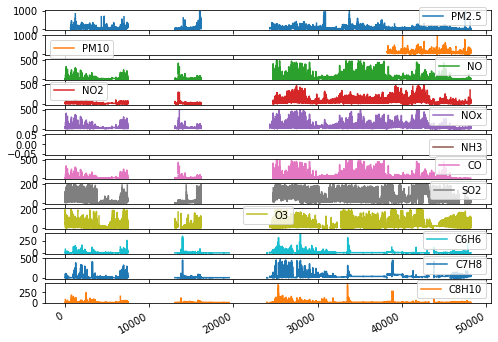

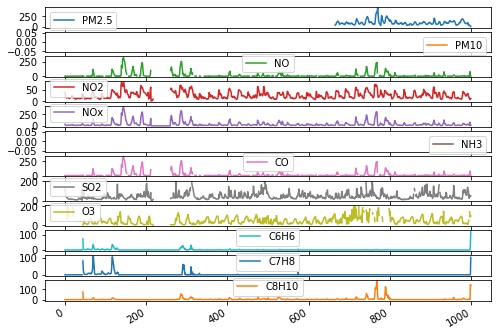

In [16]:
plot_cols = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO',
       'SO2', 'O3', 'C6H6', 'C7H8', 'C8H10']
plot_features = Ahmedabad_data[plot_cols]
_ = plot_features.plot(subplots=True)

plot_features = Ahmedabad_data[plot_cols][:1000]
_ = plot_features.plot(subplots=True)

In [18]:
"""
Here i am using KNN imputer from sklearn

"""

from sklearn.impute import KNNImputer
KNN = KNNImputer(n_neighbors=3)
d=Ahmedabad_data[['PM2.5','PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO',
       'SO2', 'O3', 'C6H6', 'C7H8', 'C8H10']]
d= pd.DataFrame(KNN.fit_transform(d))

In [13]:
d

,0,1,2,3,4,5,6,7,8,9,10
0,153.736667,105.846667,1.00,40.01,36.37,1.00,122.07,35.223333,0.00,0.00,0.00
1,60.143333,64.293333,0.02,27.75,19.73,0.02,85.90,32.460000,0.00,0.00,0.00
2,46.613333,88.526667,0.08,19.32,11.08,0.08,52.83,74.523333,0.00,0.00,0.00
3,45.436667,62.370000,0.30,16.45,9.20,0.30,39.53,153.580000,0.00,0.00,0.00
4,40.893333,97.833333,0.12,14.90,7.85,0.12,32.63,58.096667,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...
48187,42.920000,98.360000,2.79,84.27,43.19,1.74,20.27,66.120000,0.38,35.89,1.04
48188,44.410000,88.170000,4.28,56.44,30.73,0.57,15.20,42.410000,1.26,43.14,1.57
48189,33.680000,202.790000,4.42,37.66,21.67,0.66,15.13,25.660000,1.73,47.05,1.87
48190,56.860000,222.730000,3.77,29.78,17.34,0.04,11.66,14.350000,1.73,47.05,1.87


In [17]:
Ahmedabad_data['PM2.5']=d[0]
Ahmedabad_data['PM10']=d[1]
Ahmedabad_data["NO"]=d[2]
Ahmedabad_data['NO2']=d[3]
Ahmedabad_data['NOx']=d[4]
Ahmedabad_data['NH3']=d[5]
Ahmedabad_data['CO']=d[6]
Ahmedabad_data['SO2']=d[7]
Ahmedabad_data['O3']=d[8]
Ahmedabad_data['C6H6']=d[9]
Ahmedabad_data['C7H8']=d[10]
Ahmedabad_data['C8H10']=d[11]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

KeyError: ignored